<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. ✔️
- Normalize the data (all features should have roughly the same scale) ✔️
- Import the type of model and layers that you will need from Keras. ✔️
- Instantiate a model object and use `model.add()` to add layers to your model ✔️
- Since this is a regression model you will have a single output node in the final layer. ✔️
- Use activation functions that are appropriate for this task ✔️
- Compile your model ✔️
- Fit your model and report its accuracy in terms of Mean Squared Error ✔️
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. ✔️
- Run this same data through a linear regression model. Which achieves higher accuracy? ✔️ **- The Linear Regression Model Achieved Higher Accuracy**
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# Load in the boston housing data and train-test-split
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print('Train Shapes:')
print(f'X: {X_train.shape}')
print(f'y: {y_train.shape}')

print()

print('Test Shapes:')
print(f'X: {X_test.shape}')
print(f'y: {y_test.shape}')

Train Shapes:
X: (404, 13)
y: (404,)

Test Shapes:
X: (102, 13)
y: (102,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (404, 13)
X_test shape: (102, 13)


In [0]:
from tensorflow.keras.models import Sequential  # Our model
from tensorflow.keras.layers import Dense  # For our layers.


model1 = Sequential()  # Instantiate the model

# Adding six total layers. Using rectified linear units until our output layer, where we will use sigmoid.
# This is where we are actually building the model.
model1.add(Dense(50, activation='relu', input_dim=13, name='InputLayer'))
model1.add(Dense(25, activation='relu', name='Hidden1'))
model1.add(Dense(15, activation='relu', name='Hidden2'))
model1.add(Dense(5, activation='relu', name='Hidden3'))
model1.add(Dense(3, activation='relu', name='Hidden4'))
model1.add(Dense(1, activation='sigmoid', name='OutputLayer'))

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])  # Compile our model.

model1fit = model1.fit(X_train, y_train, epochs=250, verbose=False)  # Fit our model to training data, 250 iterations / epochs

In [0]:
score1 = model1.evaluate(X_test, y_test, verbose=False)
print(f'MSE for Neural Network: {score1[1]}')

MSE for Neural Network: 570.7009887695312


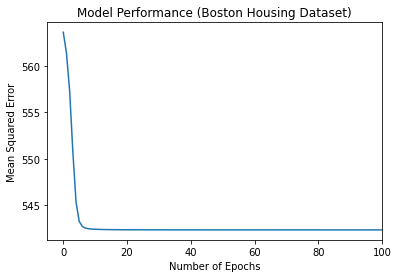

In [0]:
# We're going to plot our model performance based upon our metric + number of epochs.

import matplotlib.pyplot as plt

plt.plot(model1fit.history['mean_squared_error'])
plt.title('Model Performance (Boston Housing Dataset)')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.xlim(-5, 100)
plt.show();

In [0]:
# Let's do it again, this time with linear regression.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()  # Instantiate

linreg.fit(X_train, y_train)  # Fit the Model
y_pred = linreg.predict(X_test)  # Make Predictions

print(f'MSE for Linear Regression: {mean_squared_error(y_test, y_pred)}')  # Evaluate our model.

MSE for Linear Regression: 23.195599256422984


In [0]:
import pandas as pd

boston = boston_housing.load_data()
df = pd.DataFrame.from_dict(boston)

df.head()

# Ok... Now I'm confused. How would I import assign column names for feature engineering?

,0,1
0,"[[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7,...","[15.2, 42.3, 50.0, 21.1, 17.7, 18.5, 11.3, 15...."
1,"[[18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0...","[7.2, 18.8, 19.0, 27.0, 22.2, 24.5, 31.2, 22.9..."


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class. ✔️
- Make sure to one-hot encode your category labels ✔️
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST. ✔️
- Try different hyperparameters. What is the highest accuracy that you are able to achieve. ✔️
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. ✔️
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results. ✔️

In [0]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train Shapes:')
print(f'X: {X_train.shape}')
print(f'y: {y_train.shape}')

print()

print('Test Shapes:')
print(f'X: {X_test.shape}')
print(f'y: {y_test.shape}')

Train Shapes:
X: (60000, 28, 28)
y: (60000,)

Test Shapes:
X: (10000, 28, 28)
y: (10000,)


In [0]:
from tensorflow import keras

# Defining number of classes (15)
num_classes = 15

# Define image pixel sizes
img_rows = 28
img_cols = 28

# Reshape our data.
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

# X Variable Types
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Categorical encoding on targets
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')

X_train Shape: (60000, 784)
X_test Shape: (10000, 784)


In [0]:
import datetime
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping  # For regularization 
from tensorflow.keras.layers import Dropout, Flatten


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))  # Log directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) # Our callback
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10)  # Monitoring by val_accuracy, minimum improvement 0.005, stop if no improvement after 10 epochs


model2 = Sequential()

model2.add(Flatten(name='FlattenLayer'))
model2.add(Dense(75, activation='sigmoid', input_dim=784, name='Input'))
model2.add(Dropout(0.2, name='FirstDropout'))
model2.add(Dense(50, activation='sigmoid', name='HiddenLayer1'))
model2.add(Dropout(0.2, name='SecondDropout'))
model2.add(Dense(40, activation='sigmoid', name='HiddenLayer2'))
model2.add(Dropout(0.2, name='ThirdDropout'))
model2.add(Dense(20, activation='sigmoid', name='HiddenLayer3'))
model2.add(Dropout(0.2, name='FourthDropout'))
model2.add(Dense(15, activation='softmax', name='OutputLayer'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2fit = model2.fit(X_train, y_train, validation_data=(X_test, y_test),
                       epochs=250, callbacks=[tensorboard_callback, stop],
                       verbose=False)
score2 = model2.evaluate(X_test, y_test, verbose=False)

In [0]:
print(f'Accuracy for Fashion-MNIST Dataset: {score2[1]}')

Accuracy for Fashion-MNIST Dataset: 0.8751999735832214


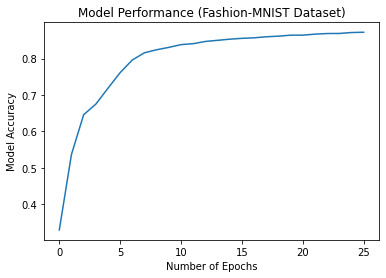

In [0]:
plt.plot(model2fit.history['accuracy'])
plt.title('Model Performance (Fashion-MNIST Dataset)')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.show();

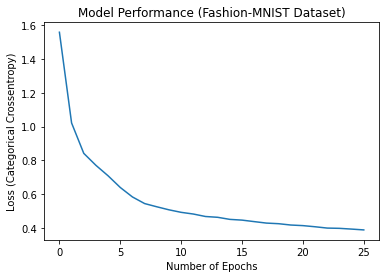

In [0]:
plt.plot(model2fit.history['loss'])
plt.title('Model Performance (Fashion-MNIST Dataset)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.